In [1]:
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

In [53]:
def plotcent(cent):
    '''
        cent.shape should be (nCent, nDim)
    '''
    def con(a,b):
        return np.concatenate((a,b),axis=1)
    #cent = np.swapaxes(cent,0,2)
    #cent = np.swapaxes(cent,1,2)
    cent2=reduce(con,cent)
    plt.figure()
    plt.imshow(cent2,cmap = plt.get_cmap('gray'))
    plt.show()
    
def genData():
    nData = 1000

    m1 = [3,3]
    s1 = [[0.5,0],[0,0.5]]
    m2 = [0,0]
    s2 = [[0.2,0.1],[0.1,0.2]]
    m3 = [-3,3]
    s3 = [[0.1,0.1],[0.1,0.2]]

    X = np.concatenate(
        (np.random.multivariate_normal(m1,s1,nData),
        np.random.multivariate_normal(m2,s2,nData),
        np.random.multivariate_normal(m3,s3,nData)),
        axis=0)
    Y = np.concatenate(
        (np.zeros(nData),
        np.ones(nData),
        np.ones(nData)*2))

    return np.float32(X), np.float32(Y)
def plotData(X,Y=None,color=None):
    if Y==None: Y=np.ones(X.shape)

    Y_dom = np.unique(Y)
    for y in Y_dom:
        idx = np.argwhere(Y==y)
        if color==None: 
            clr=np.random.random(3,)
        else:
            clr=color
        plt.scatter(X[idx,0],X[idx,1],c=clr)
    

In [54]:
import tensorflow as tf
import numpy as np
import input_data

n_visible = 2
n_hidden = 3
nBatch = None

''' Data '''
trX, trY = genData()

''' create node for input data '''
X = tf.placeholder("float32", [nBatch, n_visible], name='X')
H = tf.placeholder("float32", [nBatch, n_hidden], name='H')

''' create nodes for hidden variables '''
#C_max = 4 * np.sqrt(6. / (n_visible + n_hidden))
#C_init = tf.random_uniform(shape=[n_visible, n_hidden],
#                           minval=-C_max,
#                           maxval=C_max)

C_init = tf.convert_to_tensor(trX[np.random.randint(0,len(trX),n_hidden)].T)

C = tf.Variable(C_init, name='C')

C2 = tf.expand_dims(tf.transpose(C),0)
X2 = tf.expand_dims(X,1)
print C2.get_shape()
print X2.get_shape()

dist = tf.reduce_sum(tf.square(tf.sub(X2,C2)),2)
cost = tf.reduce_mean(tf.reduce_min(dist,1))
choice = tf.argmin(dist,1)

train_op = tf.train.GradientDescentOptimizer(1.).minimize(cost)  # construct an optimizer
#train_op = tf.train.AdadeltaOptimizer(1e-3).minimize(cost)
#train_op = tf.train.AdamOptimizer().minimize(cost)

''' Launch the graph in a session '''
sess = tf.Session()

C_acc = np.zeros((100,2,3))

nInputBatch = 128
tf.initialize_all_variables().run(session=sess)
print('-1', sess.run(cost, feed_dict={X: trX[:nInputBatch]}))
C_acc[0] = sess.run(C)

for i in range(100):
    cnt = 0
    for start, end in zip(range(0, len(trX), nInputBatch), range(nInputBatch, len(trX), nInputBatch)):
        cnt += 1
        input_ = trX[start:end]
        _,trainCost = sess.run([train_op,cost], feed_dict={X: input_})
        #if cnt % 100 == 0: print "Iter", cnt, trainCost/nInputBatch
        if cnt<len(C_acc): C_acc[cnt] = sess.run(C)
    
    out =  sess.run([cost,dist,choice], feed_dict={X: trX})
    print 'Test iter',i, out[0], out[2]
    #print out[2]


(1, 3, 2)
(?, 1, 2)
('-1', 19.793394)
Test iter 0 0.66039 [0 0 0 ..., 1 1 1]
Test iter 1 0.596641 [0 0 0 ..., 1 1 1]
Test iter 2 0.588686 [0 0 0 ..., 1 1 1]
Test iter 3 0.589032 [0 0 0 ..., 1 1 1]
Test iter 4 0.589346 [0 0 0 ..., 1 1 1]
Test iter 5 0.589637 [0 0 0 ..., 1 1 1]
Test iter 6 0.58981 [0 0 0 ..., 1 1 1]
Test iter 7 0.58992 [0 0 0 ..., 1 1 1]
Test iter 8 0.589985 [0 0 0 ..., 1 1 1]
Test iter 9 0.590025 [0 0 0 ..., 1 1 1]
Test iter 10 0.590049 [0 0 0 ..., 1 1 1]
Test iter 11 0.590063 [0 0 0 ..., 1 1 1]
Test iter 12 0.590071 [0 0 0 ..., 1 1 1]
Test iter 13 0.590076 [0 0 0 ..., 1 1 1]
Test iter 14 0.590079 [0 0 0 ..., 1 1 1]
Test iter 15 0.590081 [0 0 0 ..., 1 1 1]
Test iter 16 0.590082 [0 0 0 ..., 1 1 1]
Test iter 17 0.590083 [0 0 0 ..., 1 1 1]
Test iter 18 0.590083 [0 0 0 ..., 1 1 1]
Test iter 19 0.590083 [0 0 0 ..., 1 1 1]
Test iter 20 0.590084 [0 0 0 ..., 1 1 1]
Test iter 21 0.590084 [0 0 0 ..., 1 1 1]
Test iter 22 0.590084 [0 0 0 ..., 1 1 1]
Test iter 23 0.590084 [0 0 0 ...

1004

In [55]:
C2.get_shape()
X2.get_shape()

TensorShape([Dimension(None), Dimension(1), Dimension(2)])

<IPython.core.display.Javascript object>


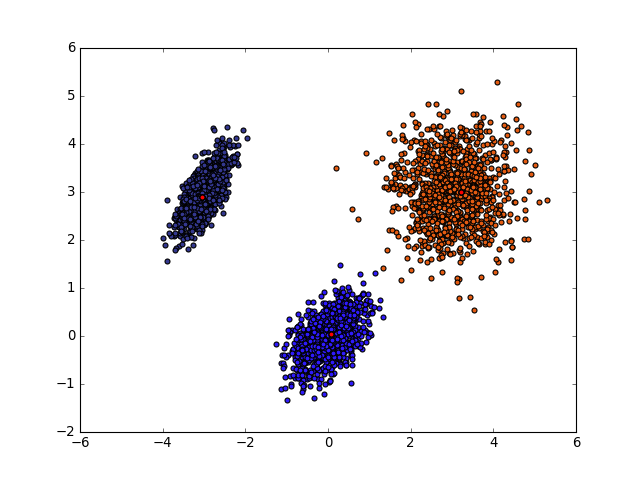

[[ 3.22538185 -3.05999804  0.06441875]
 [ 2.99158192  2.89528966  0.03350539]]


/mnt/hdd1/thkim/.local/lib/python2.7/site-packages/ipykernel/__main__.py:36: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [68]:
plt.figure()
plotData(trX,trY)
plotData(sess.run(C).T,color='r')
#plotData(C_acc[-1].T,color='r')

plt.show()
print sess.run(C)

In [27]:
from sklearn.cluster import KMeans

Kcents = 3
km = KMeans(init='k-means++',n_clusters=Kcents, n_init=5, n_jobs=8)
km.fit(trX)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=5,
    n_jobs=8, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

<IPython.core.display.Javascript object>


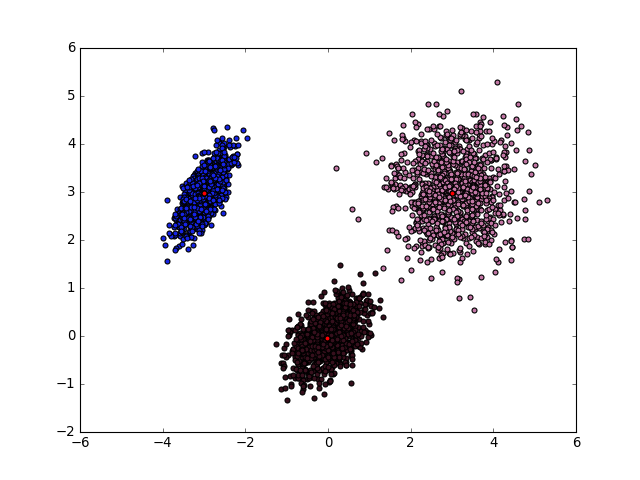

/mnt/hdd1/thkim/.local/lib/python2.7/site-packages/ipykernel/__main__.py:36: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [69]:
plt.figure()
plotData(trX,trY)
plotData(km.cluster_centers_,color='r')
plt.show()